# 군집화 - Wine Data

In [ ]:
# 한글폰트 설정(코랩)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

### 군집화

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 3033)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=3033)

In [10]:
df = pd.DataFrame({
    'pc1':wine_pca[:,0], 'pc2':wine_pca[:,1], 'target' : wine.target, 'cluster':kmeans.labels_
})
df.head()

,pc1,pc2,target,cluster
0,3.316751,-1.443463,0,0
1,2.209465,0.333393,0,0
2,2.516740,-1.031151,0,0
3,3.757066,-2.756372,0,0
4,1.008908,-0.869831,0,0


In [11]:
kmeans.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

### Visualizing
- 중심점 표시  :  각 데이터의 평균

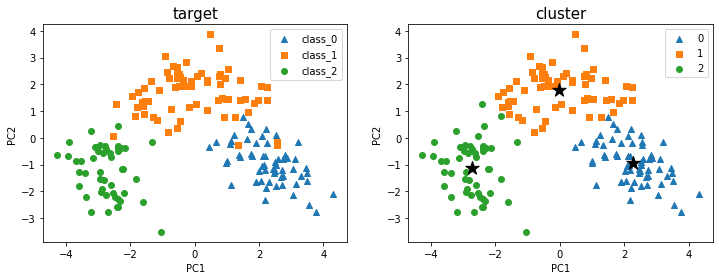

In [18]:
plt.figure(figsize = (12, 4))

for k , col in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k + 1)

    markers = ['^','s','o']
    for i in range(3):
        gr_wine = df.groupby(col).get_group(i)
        if k == 0 :
            plt.scatter(gr_wine.pc1,gr_wine.pc2, label = wine.target_names[i], marker = markers[i])
        else:
            plt.scatter(gr_wine.pc1,gr_wine.pc2, label = i, marker = markers[i])
            plt.scatter(gr_wine.pc1.mean(), gr_wine.pc2.mean(), marker = '*', c = 'black', s = 200)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    plt.title(col, fontsize = 15)
plt.show()